In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection


file_path = "output/electrode_npp_results.npz"

data = np.load(file_path)
nodes = data['nodes']
elements = data['elements']
c1_history = data['c1_history']
c2_history = data['c2_history']
phi_history = data['phi_history']
dt = data['dt'].item()  # Use .item() to get scalar value
num_steps = c1_history.shape[0]
phi_c = data['phi_c'].item()
tau_c = data['tau_c'].item()

In [126]:
c1_history.shape

(401, 441)

In [127]:
phi = pd.DataFrame(phi_history)

In [128]:
phi.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.064781,-0.064562,-0.063886,-0.062882,-0.061491,-0.059687,-0.057470,-0.054920,-0.052041,-0.048819,...,-0.058884,-0.057112,-0.055336,-0.053738,-0.052370,-0.051152,-0.050164,-0.049503,-0.049096,-0.048972
2,-0.064860,-0.064640,-0.063966,-0.062958,-0.061565,-0.059758,-0.057539,-0.054986,-0.052103,-0.048879,...,-0.058957,-0.057180,-0.055404,-0.053805,-0.052433,-0.051214,-0.050227,-0.049563,-0.049158,-0.049034
3,-0.064876,-0.064655,-0.063983,-0.062972,-0.061579,-0.059771,-0.057552,-0.054998,-0.052114,-0.048890,...,-0.058972,-0.057193,-0.055418,-0.053820,-0.052445,-0.051226,-0.050240,-0.049575,-0.049172,-0.049048
4,-0.064892,-0.064669,-0.064000,-0.062987,-0.061592,-0.059784,-0.057565,-0.055011,-0.052125,-0.048901,...,-0.058988,-0.057205,-0.055433,-0.053835,-0.052457,-0.051237,-0.050253,-0.049586,-0.049185,-0.049062


In [129]:
np.sum(c1_history[0])- np.sum(c1_history[-1])

np.float64(-5.937765507668672)

In [130]:
# k=0.5 -> -0.49
# k=5 -> -4.05

# k = 1; T = 400 -> -4.65
# k = -1; T = 400 

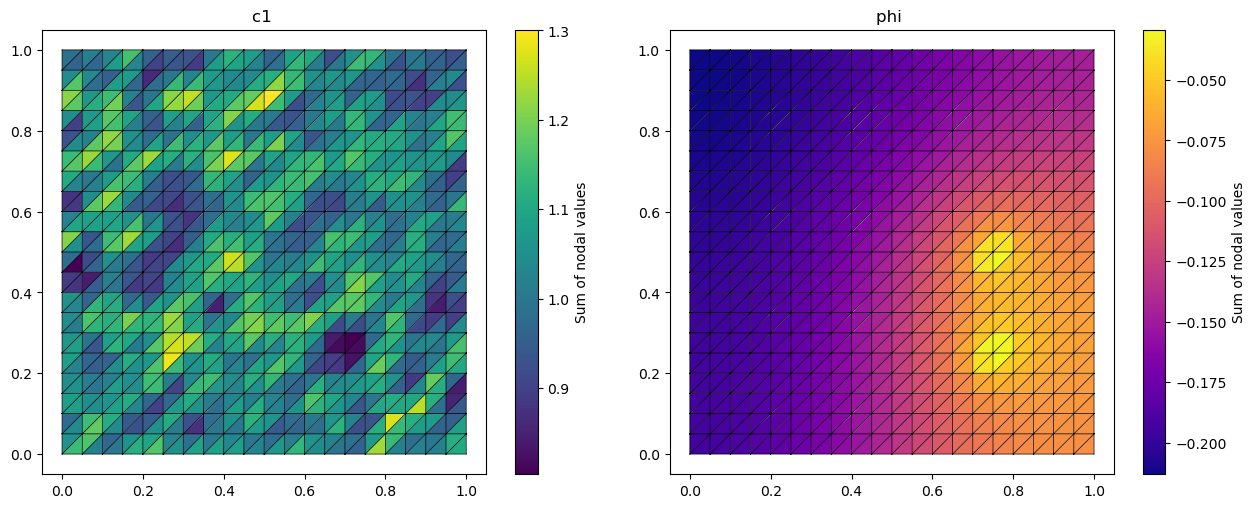

In [131]:
i = 1

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

                # --- Plot c1 on the first axis (ax1) ---
c1_triangle_values = c1_history[i][elements].sum(axis=1)
collection1 = PolyCollection(nodes[elements], cmap='viridis')
collection1.set_array(c1_triangle_values)
ax1.add_collection(collection1)
ax1.triplot(nodes[:, 0], nodes[:, 1], elements, 'k-', lw=0.5)
ax1.set_title(f"c1 ")
fig.colorbar(collection1, ax=ax1, label="Sum of nodal values")
ax1.autoscale_view()
ax1.set_aspect('equal')

                # --- Plot phi on the second axis (ax2) ---
phi_triangle_values = phi_history[i][elements].sum(axis=1)
collection2 = PolyCollection(nodes[elements], cmap='plasma')
collection2.set_array(phi_triangle_values)
ax2.add_collection(collection2)
ax2.triplot(nodes[:, 0], nodes[:, 1], elements, 'k-', lw=0.5)
ax2.set_title(f"phi ")
fig.colorbar(collection2, ax=ax2, label="Sum of nodal values")
ax2.autoscale_view()
ax2.set_aspect('equal')

                # --- Finalize and show the plot ---
plt.tight_layout()
plt.show()

In [132]:
from utils.fem_mesh import create_structured_mesh, TriangularMesh



nx, ny = 30, 30
Lx, Ly = 1.0e-7, 1.0e-7
nodes, elements = create_structured_mesh(Lx=Lx, Ly=Ly, nx=nx, ny=ny)
mesh = TriangularMesh(nodes, elements)

ValueError: too many values to unpack (expected 2)

In [ ]:
nodes.shape

(961, 2)